In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/'My Drive'/UniversalEmb

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/UniversalEmb


In [0]:
import pandas as pd
n_examples = 6000 #use all data

labels = [i.split(' ', 1 )[0].split(':')[1] for i in open('train_5500.label', encoding = 'windows-1252').readlines()][:n_examples]
texts = [ i.split(' ', 1 )[1][:-1] for i in open('train_5500.label', encoding = 'windows-1252').readlines()][:n_examples]
train  = pd.DataFrame({'texts':texts, 'labels': labels})

labels_t = [i.split(' ', 1)[0].split(':')[1] for i in open('TREC_10.label', encoding = 'windows-1252').readlines()]
texts_t = [ i.split(' ', 1)[1][:-1] for i in open('TREC_10.label', encoding = 'windows-1252').readlines()]
test  = pd.DataFrame({'texts':texts_t, 'labels': labels_t})
test.shape

(500, 2)

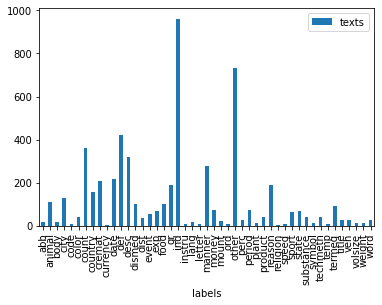

In [0]:
train.groupby('labels').count().plot.bar()

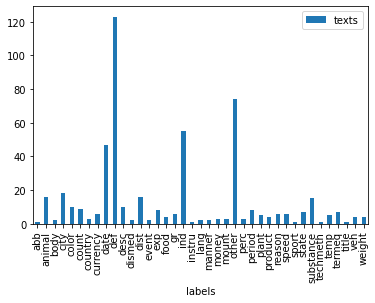

In [0]:
test.groupby('labels').count().plot.bar()

In [0]:
from scipy import stats
import numpy as np
#If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.
stats.ks_2samp([i/np.sum(train.groupby('labels').count().values.flatten()) for i in train.groupby('labels').count().values.flatten()],\
               [i/np.sum(test.groupby('labels').count().values.flatten()) for i in test.groupby('labels').count().values.flatten()])

Ks_2sampResult(statistic=0.21222040370976542, pvalue=0.24282366077934026)

In [0]:
def creat_datasets(n, df):
  #with random number different classes to classify 
  n_trains = []
  for i in range(0,df.shape[0],(df.shape[0])//n+1):
    #sample = df.sample((df.shape[0]//n)+1, random_state=i+100)
    sample = df[i:i+(df.shape[0])//n+1]
    n_trains.append(sample)
  return n_trains

train_samples = creat_datasets(3, train)

In [0]:
def creat_datasets(n, df, k=50):
  #k если у категории менее 50 примеров, то берем все, в другом случае семплируем половину примеров этого лейбла случайно
  #with the same number of classes as it was in the original dataset
  lbl_distibution = {i[0]:i[1] for i in df.groupby('labels').count().reset_index().values.tolist()}
  n_trains = []
  for _ in range(n):
    sampled_train = []
    for lbl in df.labels.unique():
      pick_n_samples = lbl_distibution[lbl]//2+1
      if pick_n_samples > k:
        sample = df[df['labels']==lbl].sample(pick_n_samples)
      else:
        sample = df[df['labels']==lbl].sample(lbl_distibution[lbl])

      sampled_train.extend(sample.values)
    n_trains.append(pd.DataFrame({'texts':[i for i, j in sampled_train],'labels':[j for i, j in sampled_train]}))
  return n_trains

n_trains = creat_datasets(3, train)

In [0]:
n_trains[1].shape

(3220, 2)

In [0]:
n_trains[1]

,texts,labels
0,How do vending machines tell if your dollar is...,manner
1,How can I find online spelling ?,manner
2,How is Easter Sunday 's date determined ?,manner
3,How does blood clot ?,manner
4,How would I find the price of different organs...,manner
...,...,...
3215,What is the weight of air ?,weight
3216,What currency is used in Australia ?,currency
3217,What money was used here ?,currency
3218,What money was used by them ?,currency


In [0]:
n_trains[0]

,texts,labels
0,How did names come about ?,manner
1,How does one correctly pronounce ` qigong ' ?,manner
2,How is Abigail Arcane related to the villainou...,manner
3,How do I find out the exact time of a sunset f...,manner
4,How does the speed the magnet spins in a gener...,manner
...,...,...
3215,How many pounds are there in a stone ?,weight
3216,What money was used by them ?,currency
3217,What currency is used in Australia ?,currency
3218,What type of currency is used in China ?,currency


In [0]:
for sample in n_trains:
  print(stats.ks_2samp([i/np.sum(train.groupby('labels').count().values.flatten()) for i in train.groupby('labels').count().values.flatten()],\
                       [i/np.sum(sample.groupby('labels').count().values.flatten()) for i in sample.groupby('labels').count().values.flatten()]))

Ks_2sampResult(statistic=0.19148936170212766, pvalue=0.3578951212975654)
Ks_2sampResult(statistic=0.19148936170212766, pvalue=0.3578951212975654)
Ks_2sampResult(statistic=0.19148936170212766, pvalue=0.3578951212975654)


In [0]:
!pip install transformers

     |████████████████████████████████| 573kB 2.8MB/s 
     |████████████████████████████████| 3.7MB 42.8MB/s 
     |████████████████████████████████| 890kB 41.8MB/s 
     |████████████████████████████████| 1.0MB 38.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893260 sha256=ba0ce96672274f2090d25535685fe158305dd305cf7c067f3dea94bdb51cf1de
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [0]:
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import torch

def prep_data(sentences, MAX_LEN = 64):
  tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
  input_ids = []
  for sent in tqdm(sentences):
      encoded_sent = tokenizer.encode(sent, add_special_tokens = True)
      input_ids.append(encoded_sent[:MAX_LEN])
  input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", value=0, truncating="post", padding="post")
  attention_masks = []
  for sent in input_ids:
      att_mask = [int(token_id > 0) for token_id in sent]
      attention_masks.append(att_mask)
  return input_ids, attention_masks

Using TensorFlow backend.


In [0]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig, BertTokenizer
from transformers import get_linear_schedule_with_warmup
import time
import datetime
import random
from sklearn.metrics import f1_score

In [0]:
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [0]:
lbls2indx = {lbl:indx for indx, lbl in enumerate(train.labels.unique())}
indx2lbl = {indx:lbl for lbl, indx in lbls2indx.items()}

In [0]:
from sklearn.metrics import classification_report

def train_bert(train, test):
  batch_size = 16
  def lbl2indx(x):
    return lbls2indx[x]

  print(train.groupby('labels').count().plot.bar())
  print("Labels unique in Train %s - amount:%i" % (train.labels.unique(), len(train.labels.unique())))
  print("Labels unique in Test %s - amount:%i" % (test.labels.unique(), len(test.labels.unique())))
  print(stats.ks_2samp([i/np.sum(train.groupby('labels').count().values.flatten()) for i in train.groupby('labels').count().values.flatten()],\
               [i/np.sum(test.groupby('labels').count().values.flatten()) for i in test.groupby('labels').count().values.flatten()]))
  
  train['lb'] = train.labels.apply(lbl2indx)
  test['lb'] = test.labels.apply(lbl2indx)


  train_input_ids, train_attention_masks = prep_data(train.texts.values.tolist())
  test_input_ids, test_attention_masks = prep_data(test.texts.values.tolist())

  train_inputs = torch.tensor(train_input_ids)
  validation_inputs = torch.tensor(test_input_ids)

  train_labels = torch.tensor(train.lb.values.tolist())
  validation_labels = torch.tensor(test.lb.values.tolist())

  train_masks = torch.tensor(train_attention_masks)
  validation_masks = torch.tensor(test_attention_masks)
  
  train_data = TensorDataset(train_inputs, train_masks, train_labels)
  train_sampler = RandomSampler(train_data)
  train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

  validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
  validation_sampler = SequentialSampler(validation_data)
  validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

  model = BertForSequenceClassification.from_pretrained("bert-base-cased", num_labels = len(list(lbls2indx.values())), output_attentions = False, output_hidden_states = True)
  model = model.cuda()
  optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 )
  epochs = 7
  total_steps = len(train_dataloader) * epochs
  scheduler = get_linear_schedule_with_warmup(optimizer, 
                                              num_warmup_steps = 50, # Default value in run_glue.py
                                              num_training_steps = total_steps)
  device = 'cuda'
  seed_val = 42

  random.seed(seed_val)
  np.random.seed(seed_val)
  torch.manual_seed(seed_val)
  torch.cuda.manual_seed_all(seed_val)
  loss_values = []

  for epoch_i in range(0, epochs):
      embeddings = []

      print("")
      print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
      print('Training...')
      t0 = time.time()
      total_loss = 0
      model.train()

      for step, batch in enumerate(train_dataloader):
          if step % 40 == 0 and not step == 0:
              elapsed = format_time(time.time() - t0)
              print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
          b_input_ids = batch[0].to(device)
          b_input_mask = batch[1].to(device)
          b_labels = batch[2].to(device)
          model.zero_grad()        

          outputs = model(b_input_ids, 
                      token_type_ids=None, 
                      attention_mask=b_input_mask, 
                      labels=b_labels)
          
          loss  = outputs[0]
          embeddings.append(outputs[2][-1][:,0,:])
          total_loss += loss.item()
          loss.backward()
          torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

          optimizer.step()
          scheduler.step()

      avg_train_loss = total_loss / len(train_dataloader)            
      loss_values.append(avg_train_loss)

      print("")
      print("  Average training loss: {0:.2f}".format(avg_train_loss))
      print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
          
      print("")
      print("Running Validation...")

      t0 = time.time()
      test_targets, test_pred_class = [], []

      model.eval()

      eval_loss, eval_accuracy = 0, 0
      nb_eval_steps, nb_eval_examples = 0, 0

      for batch in validation_dataloader:
          
          batch = tuple(t.to(device) for t in batch)
          
          b_input_ids, b_input_mask, b_labels = batch
          with torch.no_grad():        
              outputs = model(b_input_ids, 
                              token_type_ids=None, 
                              attention_mask=b_input_mask)
          logits = outputs[0]

          # Move logits and labels to CPU
          logits = logits.detach().cpu().numpy()
          label_ids = b_labels.to('cpu').numpy()
          test_targets.append(label_ids)
          test_pred_class.append(np.argmax(logits, axis=1))
          
          # Calculate the accuracy for this batch of test sentences.          
          # Accumulate the total accuracy.

          nb_eval_steps += 1
      test_targets = np.concatenate(test_targets).squeeze()
      test_pred_class = np.concatenate(test_pred_class).squeeze()

      f1 = f1_score(test_targets, test_pred_class, average='micro')
      print(classification_report(test_targets, test_pred_class))

      # Report the final accuracy for this validation run.
      print("  F1: {0:.4f}".format(f1))
      print("  Validation took: {:}".format(format_time(time.time() - t0)))

  print("")
  print("Training complete!")
  return model

In [0]:
bert_models=[]
for ind,tr_part in enumerate(n_trains):
  print('Start fitting bert #{}'.format(ind+1))
  bert_models.append(train_bert(tr_part,test))


In [0]:
for instance in list(tqdm._instances):
    tqdm._decr_instances(instance)

In [0]:
len(bert_models)

3

In [0]:
from torch import nn
from tqdm import tqdm
def bert_proba(boundary, model, sentences):
  batch_size = 16
  device = "cuda"

  train_input_ids, train_attention_masks = prep_data(sentences)

  train_inputs = torch.tensor(train_input_ids)
  train_labels = torch.tensor([0]*len(sentences))
  train_masks = torch.tensor(train_attention_masks)
  
  train_data = TensorDataset(train_inputs, train_masks, train_labels)
  train_dataloader = DataLoader(train_data, shuffle=False, batch_size=batch_size)

  model.eval()
  augmentations = []
  for batch in tqdm(train_dataloader):
      
      batch = tuple(t.to(device) for t in batch)
      
      b_input_ids, b_input_mask, b_labels = batch
      with torch.no_grad():        
          outputs = model(b_input_ids, 
                          token_type_ids=None, 
                          attention_mask=b_input_mask)
      logits = outputs[0]
      probs = nn.Softmax(dim=-1)(logits)

      probs = probs.detach().cpu().numpy()
      samples = []
      for indx, i in enumerate(probs.tolist()):
        if any(boundary<y for y in i):
          samples.append((indx, i.index(max(i))))
      augmentations.append(samples)
   
  aug_samples_indx = []
  for ind, i in enumerate(augmentations):
    if ind==0:
      aug_samples_indx.extend([(j,k) for j,k in i])
    else:
      aug_samples_indx.extend([((batch_size*ind)+j, k) for j,k in i])
  print()
  print(len(aug_samples_indx))
  return aug_samples_indx


In [0]:
sq_sents = [i[:-1] for i in open('SQuAD.txt').readlines()]
sq_sents[:10]

['When did Beyonce start becoming popular?',
 'After her second solo album, what other entertainment venture did Beyonce explore?',
 'In her music, what are some recurring elements in them?',
 "Beyonce's younger sibling also sang with her in what band?",
 'What town did Beyonce go to school in?',
 "Who decided to place Beyonce's group in Star Search the talent show?",
 "Which film featured Destiny's Child's first major single?",
 'What mental health issue did Beyonce go through?',
 '"Charlie\'s Angels" featured which single from the band members?',
 'Who did Beyonce star with in the movie, "Austin Powers in Goldmember"?']

100%|██████████| 8145/8145 [09:27<00:00, 14.35it/s]



104659


100%|██████████| 8145/8145 [09:28<00:00, 14.33it/s]



100433


100%|██████████| 8145/8145 [09:29<00:00, 14.31it/s]



98918


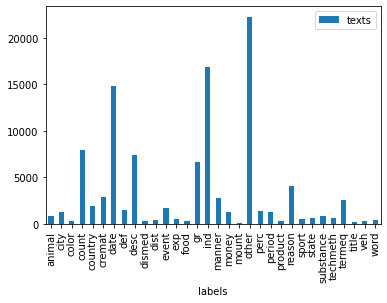

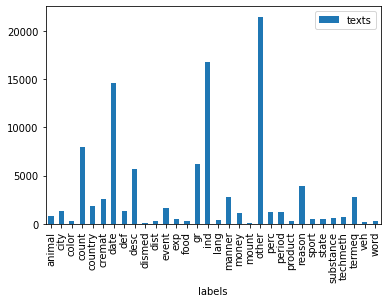

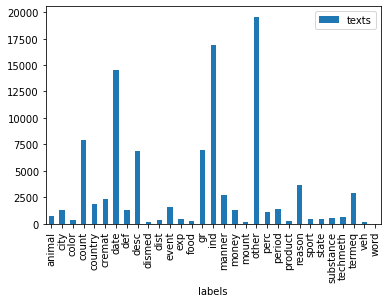

In [0]:
for i, model in enumerate(bert_models):
  squand_index_model_1 = bert_proba(0.7, model, list(sq_sents))
  augmetation_squad = pd.DataFrame({"texts":[sq_sents[i] for i,j in squand_index_model_1], "labels":[indx2lbl[j] for i,j in squand_index_model_1]})
  augmetation_squad.groupby('labels').count().plot.bar()
  augmetation_squad.to_csv('TREC50_Dataset_random_with_same_n_classes_Model_number_3_Bert_#{}_squad_0.7.csv'.format(str(i)))

In [0]:
import pandas as pd
data_model_1 = pd.read_csv('TREC50_Dataset_random_with_same_n_classes_Model_number_3_Bert_#0_squad_0.7.csv', index_col=0)
data_model_2 = pd.read_csv('TREC50_Dataset_random_with_same_n_classes_Model_number_3_Bert_#1_squad_0.7.csv', index_col=0)
data_model_3 = pd.read_csv('TREC50_Dataset_random_with_same_n_classes_Model_number_3_Bert_#2_squad_0.7.csv', index_col=0)

In [0]:
frameList = [data_model_1,data_model_2,data_model_3]
for i in frameList:
  print(i.shape)
df_merge = frameList[0]
for df in frameList[1:]:       
    df_merge = pd.merge(df_merge, df, on=('texts',"labels"), how='inner')

(104659, 2)
(100433, 2)
(98918, 2)


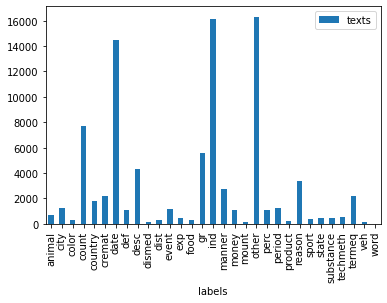

In [0]:
df_merge[['texts', 'labels']].groupby('labels').count().plot.bar()

In [0]:
df_merge

,texts,labels
0,When did Beyonce start becoming popular?,date
1,"In her music, what are some recurring elements...",desc
2,What town did Beyonce go to school in?,city
3,Who decided to place Beyonce's group in Star S...,ind
4,Which film featured Destiny's Child's first ma...,cremat
...,...,...
87902,How long have scientists focused on an element...,period
87903,What field does not view matter as a contribut...,other
87904,How many electrons are there in the generations?,count
87905,Who discovered quantum chemistry?,ind


In [0]:
import pandas as pd
n_examples = 5000

labels = [i.split(' ', 1 )[0].split(':')[1] for i in open('train_5500.label', encoding = 'windows-1252').readlines()][:n_examples]
texts = [ i.split(' ', 1 )[1][:-1] for i in open('train_5500.label', encoding = 'windows-1252').readlines()][:n_examples]
train  = pd.DataFrame({'texts':texts, 'labels': labels})

labels_t = [i.split(' ', 1)[0].split(':')[1] for i in open('TREC_10.label', encoding = 'windows-1252').readlines()]
texts_t = [ i.split(' ', 1)[1][:-1] for i in open('TREC_10.label', encoding = 'windows-1252').readlines()]
test  = pd.DataFrame({'texts':texts_t, 'labels': labels_t})
test.shape

(500, 2)

In [0]:
#frames = [train, df_merge[['texts', 'labels']]]
frames = [df_merge, train]
result = pd.concat(frames)
result = result.drop_duplicates('texts')

In [0]:
train_bert(result,test)

In [0]:
result

,texts,labels
0,When did Beyonce start becoming popular?,date
1,"In her music, what are some recurring elements...",desc
2,What town did Beyonce go to school in?,city
3,Who decided to place Beyonce's group in Star S...,ind
4,Which film featured Destiny's Child's first ma...,cremat
...,...,...
4995,How do I contact Answers.com direct ?,manner
4996,What causes a person to have constantly sweaty...,reason
4997,What happened to Answers.com ?,desc
4998,What is the spectrum of a sine wave ?,def


In [0]:
tr = {i:j for j, i in enumerate(train.labels.unique().tolist())}
def t(f):
  return tr[f]
result['lb'] = result.labels.apply(t)
test['lb'] = test.labels.apply(t)                  

In [0]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

In [0]:
tf = TfidfVectorizer(lowercase = False, ngram_range = (1,3), max_df =0.98, min_df = 3)
tf_res = tf.fit_transform(result.texts)
test_transform = tf.transform(test.texts)
tf_res.shape

(92241, 84045)

In [0]:
import numpy as np
from sklearn.metrics import classification_report
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import accuracy_score
import time

In [0]:
import torch
import numpy as np
from torchvision import datasets
from torchvision import transforms
from torch.utils.data.sampler import SubsetRandomSampler

class WordData(Dataset):
    
    def __init__(self, x_data, y_data):
        
        super().__init__()
        
        self.x_data = x_data
        self.y_data = torch.LongTensor([int(i) for i in y_data])
        
    
    def __len__(self):
        
        return self.x_data.shape[0]
    
    def __getitem__(self, idx):
        
        x = self.x_data[idx].toarray()
        x = torch.FloatTensor(x)
        y = self.y_data[idx]
        
        return x, y


dataset_train = WordData(tf_res, result.lb)
dataset_test = WordData(test_transform, test.lb)

batch_size = 256

train_loader = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size,  shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, shuffle=True)

In [0]:
from math import sqrt
class MLP(torch.nn.Module):
    
    def __init__(self, in_features, inner_features, inner_features2, out_features):
        
        # Главная задача этого метода - возможность использования в классе потомке, методов класса-родителя
        # Вызываем __init__ родителя - torch.nn.Module
        super().__init__()
        
        # определяем слои и все что захотим сохранять/использовать
        self.linear_1 = torch.nn.Linear(in_features=in_features, out_features=inner_features)
        gl = sqrt(6./(in_features+inner_features))
        self.linear_1.weight.data.uniform_(-gl, gl)
        self.non_linear_function = torch.nn.ReLU()
        self.drop_out = torch.nn.Dropout(0.18)
        self.linear_2 = torch.nn.Linear(in_features=inner_features, out_features=inner_features2)
        gl1 = sqrt(6./(inner_features+inner_features2))
        self.linear_2.weight.data.uniform_(-gl1, gl1)
        self.non_linear_function2 = torch.nn.ReLU()
        self.linear_3 = torch.nn.Linear(in_features=inner_features2, out_features=out_features)
        gl2 = sqrt(6./(inner_features2+out_features))
        self.linear_3.weight.data.uniform_(-gl2, gl2)
  
    def forward(self, x):
        
        # наша привычная схема
        x = self.linear_1(x)
        x = self.non_linear_function(x)
        x = self.drop_out(x)
        x = self.linear_2(x)
        x = self.non_linear_function2(x)
        x = self.linear_3(x)
        
        return x
    

In [0]:
model = MLP(in_features=tf_res.shape[1], inner_features=524, inner_features2=256, out_features=len(set(result.lb.unique())))

In [0]:
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0005,  betas=(0.9, 0.999) )
# aka loss function
criterion = torch.nn.CrossEntropyLoss()

In [0]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = model.to(device)

In [0]:
from sklearn.metrics import f1_score
epochs = 35
losses = []
best_test_loss = 10.

test_f1 = []

for n_epoch in range(epochs):
    
    train_losses = []
    test_losses = []
    test_targets = []
    test_pred_class = []
    
    progress_bar = tqdm(total=len(train_loader.dataset), desc='Epoch {}'.format(n_epoch + 1))
    
    model.train()
    
    for x, y in train_loader:
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        pred = model(x).squeeze(1)
        loss = criterion(pred, y)
        
        loss.backward()
        
        optimizer.step()
        
        train_losses.append(loss.item())
        losses.append(loss.item())
        
        progress_bar.set_postfix(train_loss = np.mean(losses[-500:]))

        progress_bar.update(x.shape[0])
        
    progress_bar.close()
    
    model.eval()
    
    for x, y in validation_loader:     
        
        x = x.to(device)
        y = y.to(device)
       

        with torch.no_grad():
            pred = model(x).squeeze(1)

            pred = pred.cpu()
            y = y.cpu()

            test_targets.append(y.numpy())
            test_pred_class.append(np.argmax(pred, axis=1))

            loss = criterion(pred, y)

            test_losses.append(loss.item())
        
    mean_test_loss = np.mean(test_losses)

    test_targets = np.concatenate(test_targets).squeeze()
    test_pred_class = np.concatenate(test_pred_class).squeeze()

    f1 = f1_score(test_targets, test_pred_class, average='micro')

    test_f1.append(f1)
    
    print()
    print('Losses: train - {:.7f}, test - {:.7f}'.format(np.mean(train_losses), mean_test_loss))

    print('F1 test - {:.4f}'.format(f1))
        
    # Early stopping:
    if mean_test_loss < best_test_loss:
        best_test_loss = mean_test_loss
    else:
        print('Early stopping')
        break

Epoch 2:   0%|          | 256/92241 [00:00<01:05, 1398.58it/s, train_loss=1.26]


Losses: train - 1.2599285, test - 1.3693288
F1 test - 0.7820


Epoch 3:   0%|          | 256/92241 [00:00<01:04, 1431.37it/s, train_loss=0.249]


Losses: train - 0.1638225, test - 1.1394058
F1 test - 0.8180


Epoch 4:   0%|          | 256/92241 [00:00<01:07, 1355.34it/s, train_loss=0.0687]


Losses: train - 0.0415104, test - 1.0675113
F1 test - 0.8220


Epoch 5:   0%|          | 256/92241 [00:00<01:06, 1389.10it/s, train_loss=0.024]


Losses: train - 0.0171226, test - 1.0644870
F1 test - 0.8200


Epoch 5: 100%|██████████| 92241/92241 [01:06<00:00, 1394.92it/s, train_loss=0.0119]



Losses: train - 0.0099367, test - 1.0817927
F1 test - 0.8280
Early stopping


In [0]:
model

MLP(
  (linear_1): Linear(in_features=84045, out_features=524, bias=True)
  (non_linear_function): ReLU()
  (drop_out): Dropout(p=0.18, inplace=False)
  (linear_2): Linear(in_features=524, out_features=256, bias=True)
  (non_linear_function2): ReLU()
  (linear_3): Linear(in_features=256, out_features=47, bias=True)
)

In [0]:
for instance in list(tqdm._instances):
    tqdm._decr_instances(instance)

In [0]:
result_first_part = [(0.792, 0.792), (0.832, 0.832), (0.838, 0.838), (0.842, 0.842), (0.828, 0.828), (0.8399999999999999, 0.84), (0.81, 0.81), (0.854, 0.854), (0.83, 0.83), (0.85, 0.85), (0.834, 0.834), (0.844, 0.844), (0.79, 0.79), (0.82, 0.82), (0.828, 0.828), (0.8399999999999999, 0.84), (0.836, 0.836), (0.838, 0.838), (0.8119999999999999, 0.812), (0.856, 0.856), (0.832, 0.832), (0.836, 0.836), (0.8399999999999999, 0.84), (0.858, 0.858), (0.792, 0.792), (0.818, 0.818), (0.836, 0.836), (0.844, 0.844), (0.83, 0.83), (0.836, 0.836), (0.81, 0.81)]

In [0]:
result = result_first_part[:24]

In [0]:
len(result_first_part)

31

In [0]:
data_augs_params = [] 
for proba in [0.3, 0.5]:
  for bs in [('min', 'mean'), ('mean', 'max'), ('min','max')]:
    for coefs in [(0.5, 0.5), (1, 1), (2, 2), (0.5, 2)]:
      name = 'Proba: '+str(proba)+' Distance: '+bs[0]+'*'+str(coefs[0])+','+bs[1]+'*'+str(coefs[1])
      data_augs_params.append(name)
data_augs_params

['Proba: 0.3 Distance: min*0.5,mean*0.5',
 'Proba: 0.3 Distance: min*1,mean*1',
 'Proba: 0.3 Distance: min*2,mean*2',
 'Proba: 0.3 Distance: min*0.5,mean*2',
 'Proba: 0.3 Distance: mean*0.5,max*0.5',
 'Proba: 0.3 Distance: mean*1,max*1',
 'Proba: 0.3 Distance: mean*2,max*2',
 'Proba: 0.3 Distance: mean*0.5,max*2',
 'Proba: 0.3 Distance: min*0.5,max*0.5',
 'Proba: 0.3 Distance: min*1,max*1',
 'Proba: 0.3 Distance: min*2,max*2',
 'Proba: 0.3 Distance: min*0.5,max*2',
 'Proba: 0.5 Distance: min*0.5,mean*0.5',
 'Proba: 0.5 Distance: min*1,mean*1',
 'Proba: 0.5 Distance: min*2,mean*2',
 'Proba: 0.5 Distance: min*0.5,mean*2',
 'Proba: 0.5 Distance: mean*0.5,max*0.5',
 'Proba: 0.5 Distance: mean*1,max*1',
 'Proba: 0.5 Distance: mean*2,max*2',
 'Proba: 0.5 Distance: mean*0.5,max*2',
 'Proba: 0.5 Distance: min*0.5,max*0.5',
 'Proba: 0.5 Distance: min*1,max*1',
 'Proba: 0.5 Distance: min*2,max*2',
 'Proba: 0.5 Distance: min*0.5,max*2']

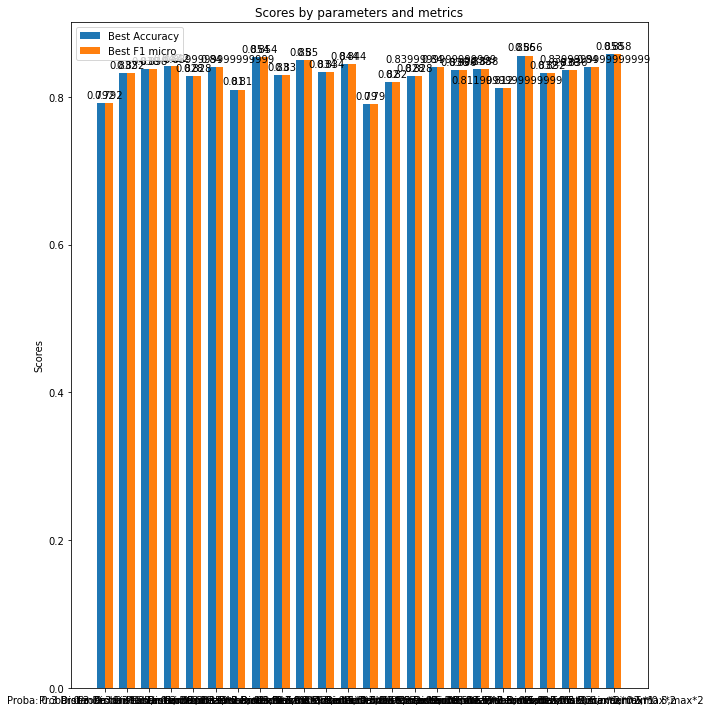

In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = data_augs_params
accs = [i for j, i in result]
f1 = [j for j, i in result]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,10))
rects1 = ax.bar(x - width/2, accs, width, label='Best Accuracy')
rects2 = ax.bar(x + width/2, f1, width, label='Best F1 micro')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by parameters and metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()